In [1]:
!pip install apache-beam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 73.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 30.6 MB

In [11]:
import pandas as pd
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.transforms.window import FixedWindows
from apache_beam.transforms.trigger import AfterCount, AfterProcessingTime, AccumulationMode


In [2]:


url = "/content/housing.csv"
data = pd.read_csv(url)

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

First Few Rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0     

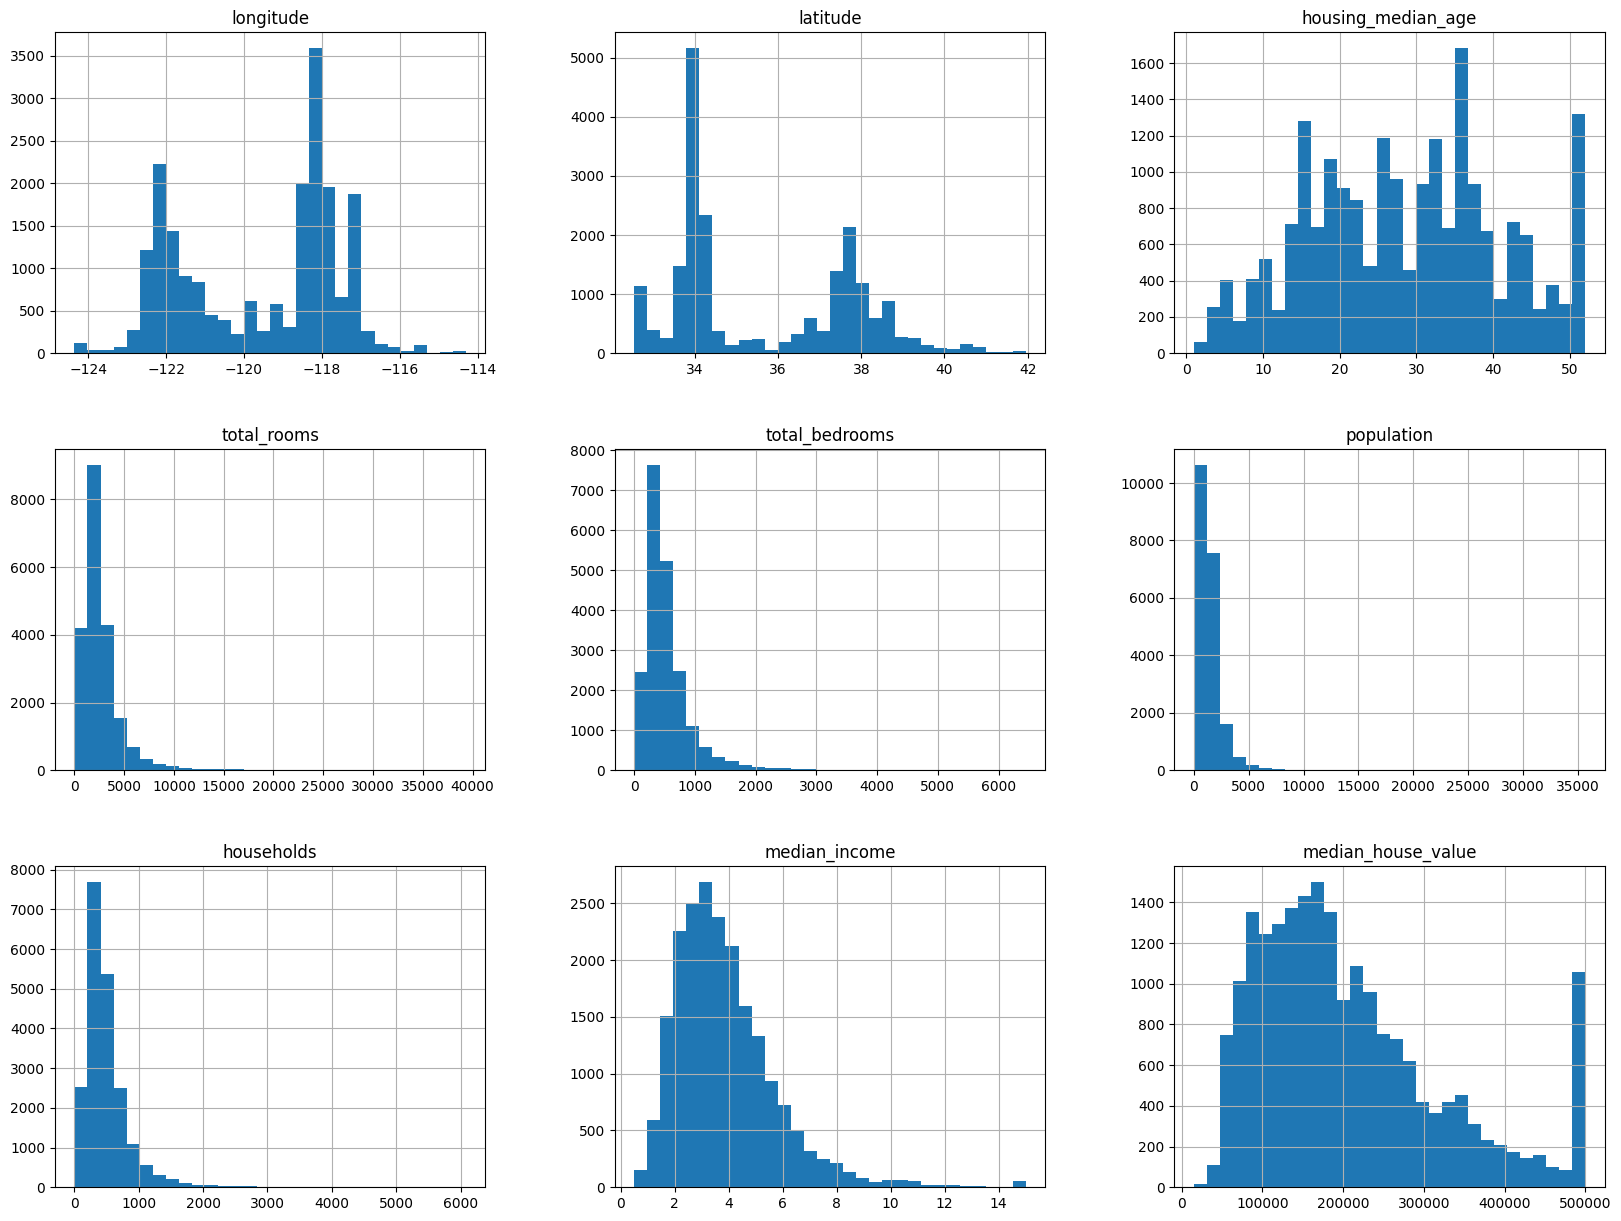


Scatter Plot (Longitude vs Latitude):


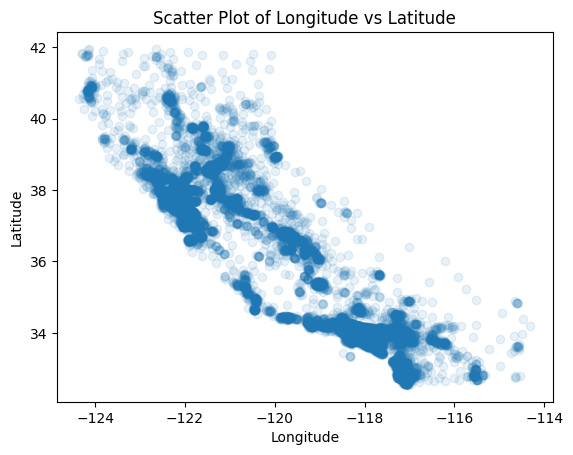


Correlation Matrix Heatmap:


<ipython-input-10-d70a9960cfa2>:40: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


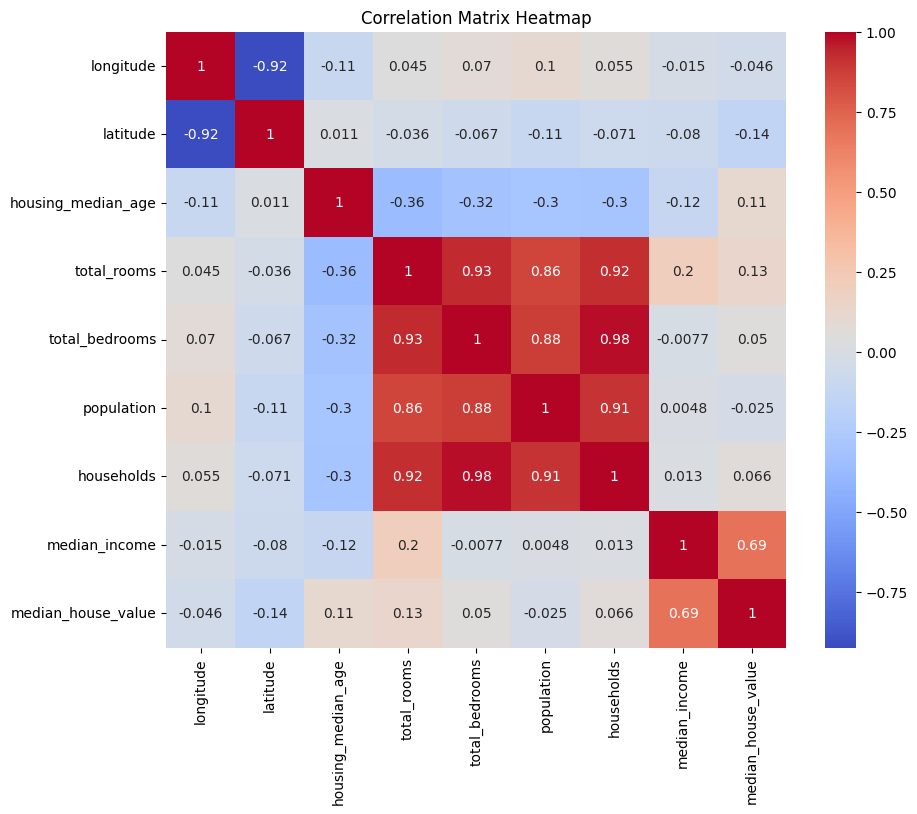


Box Plots (Outlier Detection):


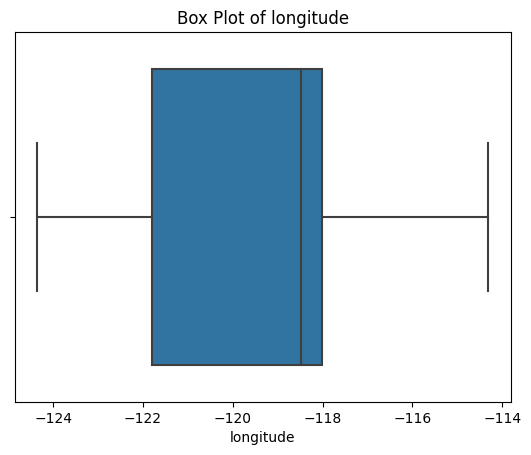

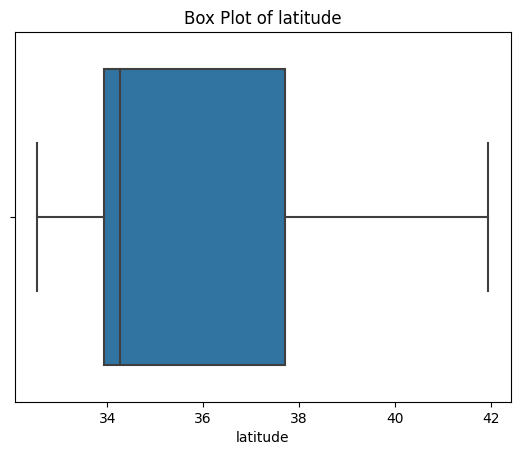

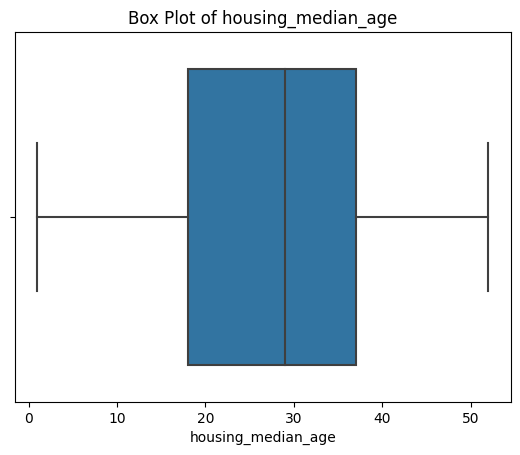

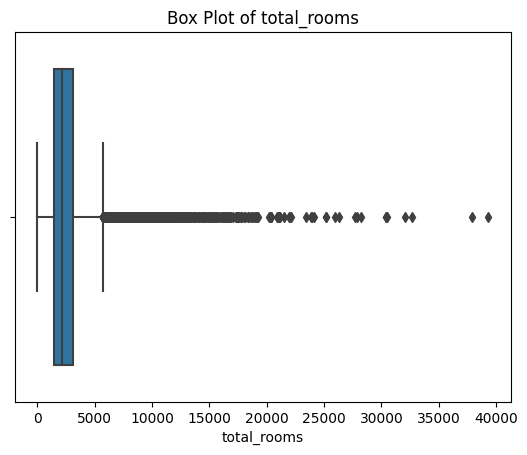

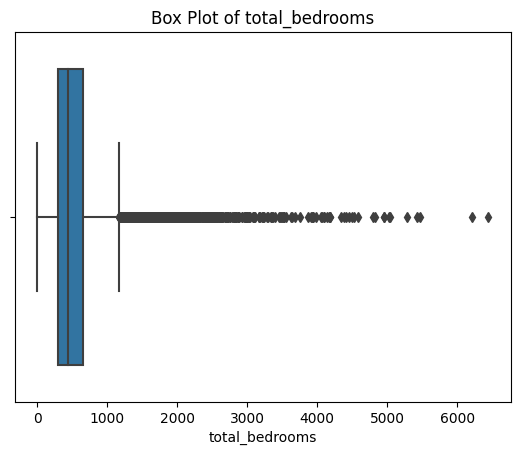

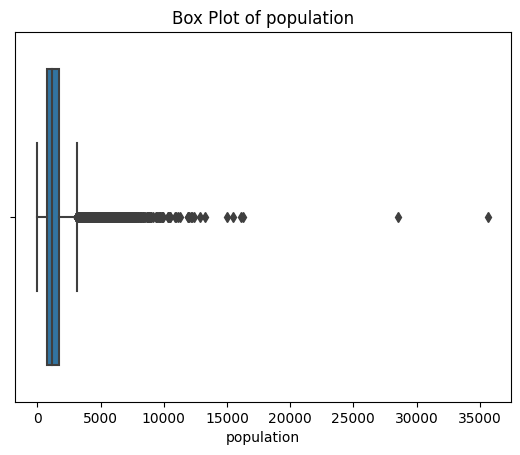

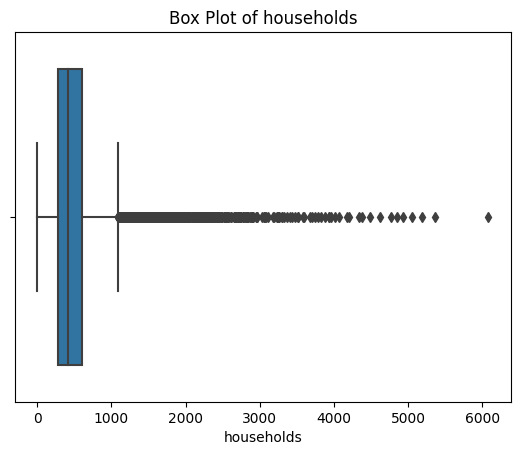

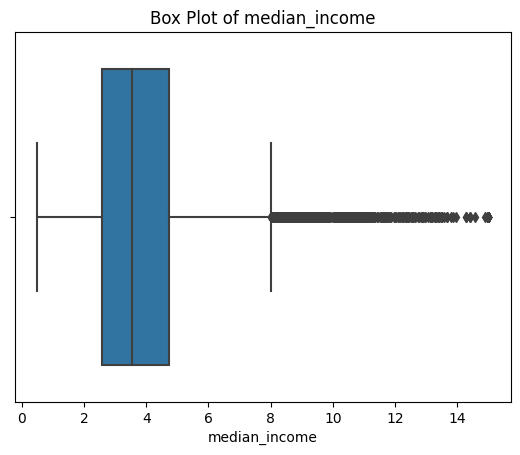

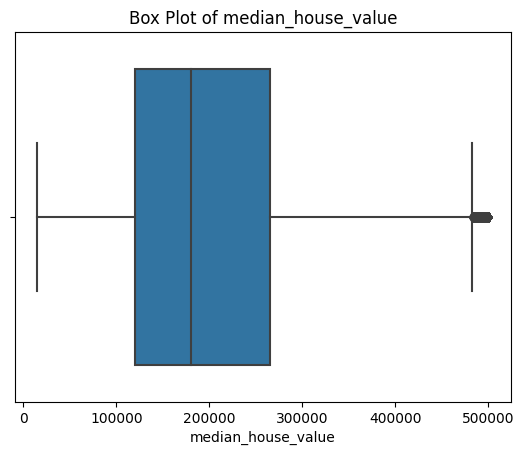

In [10]:
# Read the dataset into a pandas DataFrame
file_name = list(data.keys())[0]  # assuming the uploaded file is the first one
df = pd.read_csv(url)

# Display basic information about the dataset
print("Basic Information:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each feature
print("\nHistograms:")
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Scatter plot of longitude vs latitude
print("\nScatter Plot (Longitude vs Latitude):")
plt.scatter(df['longitude'], df['latitude'], alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.show()

# Correlation matrix heatmap
print("\nCorrelation Matrix Heatmap:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Box plots to detect outliers
print("\nBox Plots (Outlier Detection):")
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for feature in features:
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


In [12]:
# ParDo transform to process each row of the CSV file
class ProcessRow(beam.DoFn):
    def process(self, element, threshold):
        fields = element.split(',')
        latitude = float(fields[1])
        longitude = float(fields[0])
        age = float(fields[2])

        proximity_to_equator = abs(latitude)
        if proximity_to_equator < threshold:
            yield (latitude, longitude, age, proximity_to_equator, 'close')
        else:
            yield (latitude, longitude, age, proximity_to_equator, 'far')

# Composite transform to process the CSV file
class ProcessCsv(beam.PTransform):
    def __init__(self, threshold):
        self.threshold = threshold

    def expand(self, pcoll):
        return (
            pcoll
            | "Extract and Process Fields" >> beam.ParDo(ProcessRow(), self.threshold)
        )


In [14]:
options = PipelineOptions()

# Create the pipeline
with beam.Pipeline(options=options) as p:
    processed_rows = (
        p
        | "Read CSV" >> beam.io.ReadFromText(url, skip_header_lines=1)
        | "Window" >> beam.WindowInto(FixedWindows(300),
                                      trigger=AfterCount(10),
                                      accumulation_mode=AccumulationMode.DISCARDING)
        | "ProcessCsv" >> ProcessCsv(threshold=10)
        | "Print" >> beam.Map(print)
    )


Streaming output truncated to the last 5000 lines.
(37.8, -122.42, 52.0, 37.8, 'far')
(37.8, -122.42, 52.0, 37.8, 'far')
(37.8, -122.42, 52.0, 37.8, 'far')
(37.8, -122.42, 52.0, 37.8, 'far')
(37.79, -122.42, 52.0, 37.79, 'far')
(37.79, -122.42, 52.0, 37.79, 'far')
(37.79, -122.42, 52.0, 37.79, 'far')
(37.79, -122.41, 52.0, 37.79, 'far')
(37.79, -122.41, 52.0, 37.79, 'far')
(37.79, -122.41, 52.0, 37.79, 'far')
(37.8, -122.41, 52.0, 37.8, 'far')
(37.79, -122.41, 52.0, 37.79, 'far')
(37.8, -122.41, 52.0, 37.8, 'far')
(37.8, -122.39, 25.0, 37.8, 'far')
(37.79, -122.4, 52.0, 37.79, 'far')
(37.79, -122.41, 52.0, 37.79, 'far')
(37.79, -122.41, 52.0, 37.79, 'far')
(37.79, -122.41, 52.0, 37.79, 'far')
(37.79, -122.42, 52.0, 37.79, 'far')
(37.79, -122.41, 52.0, 37.79, 'far')
(37.78, -122.42, 26.0, 37.78, 'far')
(37.78, -122.42, 27.0, 37.78, 'far')
(37.81, -122.43, 39.0, 37.81, 'far')
(37.8, -122.44, 52.0, 37.8, 'far')
(37.8, -122.44, 52.0, 37.8, 'far')
(37.81, -122.43, 52.0, 37.81, 'far')
(37.81